# Group Project: **Amazon Co-purchases Network Analysis**
### Group members:  **Cuiting Zhong(cz6425), Wenying Hu(wh7893), Xueru Rong(xr677), Lining Jiang(lj8823), Tianxin Huang(th29885), Rulan Pan(rp33973)**

## Part I: Data Pre-processing

### txt to csv

In [1]:
import pandas as pd

f = open('amazon-meta.txt',mode='r',encoding='utf-8')
fulltxt=f.readlines()
f.close()
s=pd.Series(fulltxt)[2:]
s=s.reset_index(drop=True)
len(s)
idxs=s[s=='\n'].index
len(idxs)

548553

In [2]:
import re

df=pd.DataFrame(columns=['Id','ASIN','DiscontinuedORNOT','title','group','salesrank','similar','similar_id','categories','reviews','reviews_total',
                        'reviews_downloaded','reviews_avgrating','cutomer_id'])

txt=[]
for i,idx in enumerate(idxs):
    if i<len(idxs)-1:
        b=s[(idxs[i]+1):idxs[i+1]].sum()
        txt.append(b)

In [3]:
s_txt=pd.Series(txt)
df=pd.DataFrame(s_txt)
df.columns=['fulltxt']

In [4]:
df['id']=df['fulltxt'].map(lambda b:re.findall('Id:   \d+',b)[0][6:])
df['ASIN']=df['fulltxt'].map(lambda b:re.findall('ASIN: .+\n',b)[0][6:-1])
df['DiscontinuedORNOT']=df['fulltxt'].map(lambda b:'discontinued' in b)

In [5]:
df_F=df[df.DiscontinuedORNOT==False]
df_T=df[df.DiscontinuedORNOT==True]

In [6]:
df_F['title']=df_F['fulltxt'].map(lambda b:re.findall('title: .+\n',b)[0][7:-1])
df_F['group']=df_F['fulltxt'].map(lambda b:re.findall('group: .+\n',b)[0][7:-1])
df_F['salesrank']=df_F['fulltxt'].map(lambda b:re.findall('salesrank: .+\n',b)[0][11:-1])
df_F['similar']=df_F['fulltxt'].map(lambda b:re.findall('similar: .+\n',b)[0][9:-1])
df_F['similar_id']=df_F['similar'].map(lambda b:re.findall('\d+',b))
df_F['categories']=df_F['fulltxt'].map(lambda b:re.findall('categories: .+\n',b)[0][12:-1])
df_F['cutomer_id']=df_F['fulltxt'].map(lambda b:[a[10:] for a in re.findall('cutomer: \w+',b)])

def review(s):
    if 'reviews' in s:
        try:
            reviews=re.findall('reviews: .+\n',s)[0]
        except:
            reviews=re.findall('reviews: .+',s)[0]
        return reviews
    else:
        return None
df_F['reviews']=df_F['fulltxt'].map(lambda s:review(s))
df_F['reviews_total']=df_F['reviews'].map(lambda s:re.findall('total: \d+',s)[0][7:])
df_F['reviews_downloaded']=df_F['reviews'].map(lambda s:re.findall('downloaded: \d+',s)[0][12:])
df_F['reviews_avgrating']=df_F['reviews'].map(lambda s:re.findall('avg rating: \d+',s)[0][12:])
df_F.to_csv('amazon.csv',index=False)

C:\Users\rache\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rache\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rache\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

### get one-to-one book_customer dataframe

In [7]:
import pandas as pd
import re

df = pd.read_csv('amazon.csv')
df = df[df['group']=='Book']
df_book = df[['ASIN','cutomer_id']]
df_book['len_cutomer_id']=df_book['cutomer_id'].map(lambda s:len(s))
df_book=df_book[df_book.len_cutomer_id>2]

C:\Users\rache\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [8]:
def to_list(s):
    temp=s.strip('[').rstrip(']').split(",")
    temp2=[b.strip(' ').strip('\'') for b in temp]
    return temp2

df_book['Customer_id']=df_book['cutomer_id'].map(lambda s:to_list(s))

In [9]:
df_book.shape

(252858, 4)

In [10]:
df_book.head()

,ASIN,cutomer_id,len_cutomer_id,Customer_id
0,0827229534,"['2JW67OY8U6HHK', '2VE83MZF98ITY']",34,"[2JW67OY8U6HHK, 2VE83MZF98ITY]"
1,0738700797,"['11NCO6YTE4BTJ', '13SG9ACZ9O5IM', '1BDAI6VEYM...",136,"[11NCO6YTE4BTJ, 13SG9ACZ9O5IM, 1BDAI6VEYMAZA, ..."
2,0486287785,['3IDGASRQAW8B2'],17,[3IDGASRQAW8B2]
3,0842328327,['2591BUPXCS705'],17,[2591BUPXCS705]
5,0486220125,"['2ESGJTTLJWIAK', '2CHULHAO3A9BY', '3BNWP7ATVP...",187,"[2ESGJTTLJWIAK, 2CHULHAO3A9BY, 3BNWP7ATVP045, ..."


In [11]:
df_sub=df_book.sample(n=10000, random_state=2)
df_sub=df_sub[['ASIN','Customer_id']]
df_sub['len_Customer_id']=df_sub['Customer_id'].map(lambda s:len(s))
df_sub['Book_id_l']=df_sub['ASIN'].map(lambda s:[s])
df_sub['book_id_customer']=df_sub['Book_id_l']*df_sub['len_Customer_id']
df_sub.head()

,ASIN,Customer_id,len_Customer_id,Book_id_l,book_id_customer
507252,0764550101,"[3QOHWZDID9ZM9, 2P84ZRRE2ZL7D, 19DJ2XEAUOZHT, ...",12,[0764550101],"[0764550101, 0764550101, 0764550101, 076455010..."
57865,0374525285,"[17E7K3MQ5KKR5, 3C8HK3OWP3Y90, 1OL4KPWG2794I, ...",35,[0374525285],"[0374525285, 0374525285, 0374525285, 037452528..."
534898,0253214084,[2Q3S31MCOBH7D],1,[0253214084],[0253214084]
226484,0399235841,[2NJO6YE954DBH],1,[0399235841],[0399235841]
205780,0028629426,"[3L4WQ3V2R12MI, 20EEWWSFMZ1PN, 2FOIHXARTRQ47]",3,[0028629426],"[0028629426, 0028629426, 0028629426]"


In [12]:
df_customer=pd.DataFrame([pd.Series(df_sub['book_id_customer'].sum()),pd.Series(df_sub['Customer_id'].sum())]).T
df_customer.columns=['Book_id','Customer_id']
df_customer.head()
df_customer.to_csv('df_customer.csv',index=False)

## Part II: Analysis

In [2]:
import pandas as pd

df_customer=pd.read_csv('df_customer.csv')
df_customer.drop_duplicates(inplace=True)

In [3]:
Customer_count=df_customer.Customer_id.value_counts()[1:]
sub=list(Customer_count[Customer_count>3].index)
df_sub=df_customer.set_index('Customer_id')
df_sub=df_sub.loc[sub]
df_sub=df_sub.reset_index()
Book_count=df_sub.Book_id.value_counts()
sub=list(Book_count[Book_count>3].index)
df_sub=df_sub.set_index('Book_id')
df_sub=df_sub.loc[sub]
df_sub=df_sub.reset_index()
df_sub.shape

(14299, 2)

In [4]:
# Book_Customer matrix
df_crosstab=pd.crosstab(df_sub['Book_id'], df_sub['Customer_id'])
df_crosstab.shape

(1053, 2415)

### bipartite analysis

In [5]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

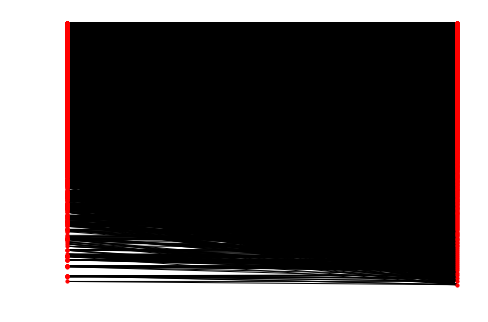

In [6]:
# Book_Customer
B = nx.Graph()
B.add_nodes_from(df_sub['Book_id'], bipartite=0)
B.add_nodes_from(df_sub['Customer_id'], bipartite=1)
B.add_edges_from([(row['Customer_id'], row['Book_id']) for idx, row in df_sub.iterrows()])

pos = {node:[0, i] for i,node in enumerate(df_sub['Customer_id'])}
pos.update({node:[1, i] for i,node in enumerate(df_sub['Book_id'])})
nx.draw(B, pos, with_labels=False,node_size=10)

bottom_nodes, top_nodes = bipartite.sets(B)

In [7]:
nx.info(B)

'Name: \nType: Graph\nNumber of nodes: 3468\nNumber of edges: 14299\nAverage degree:   8.2463'

In [8]:
bipartite.clustering(B)

{'0439064872': 0.01204164134137375,
 '0439136350': 0.01211247599094702,
 '0399144463': 0.01282506373576817,
 '0970565100': 0.013012571869146306,
 '0375400117': 0.01318332116990019,
 '0399148701': 0.021483724184183095,
 '0553713108': 0.02148372418418309,
 '1410400441': 0.02148372418418309,
 '0739302213': 0.018226006738647375,
 '0452282152': 0.016364129639871616,
 '0743504739': 0.015518337517982119,
 '0375415823': 0.017937726862986305,
 '0375430695': 0.017937726862986298,
 '0312421273': 0.016185505642425144,
 '0553528912': 0.020858630210252645,
 '044023722X': 0.01690162132772294,
 '1575111136': 0.018659630980129616,
 '0694524646': 0.022861748452643,
 '0380973650': 0.017079632955610324,
 '0842354204': 0.017596039787051654,
 '0694525332': 0.018622243815186297,
 '0380973464': 0.02069080353259926,
 '0060512806': 0.02069080353259926,
 '0684833395': 0.018093241554095408,
 '0743417682': 0.021513404615146507,
 '0345413350': 0.017959084898798636,
 '0446605484': 0.02536495051227424,
 '0316316962':

In [9]:
bipartite.average_clustering(B)

0.11240934068067222

In [10]:
list(nx.algorithms.community.kclique.k_clique_communities(B, 3))

[]

In [11]:
list(nx.algorithms.community.kclique.k_clique_communities(B, 4))

[]

In [12]:
list(nx.algorithms.community.kclique.k_clique_communities(B, 5))

[]

### Product Network

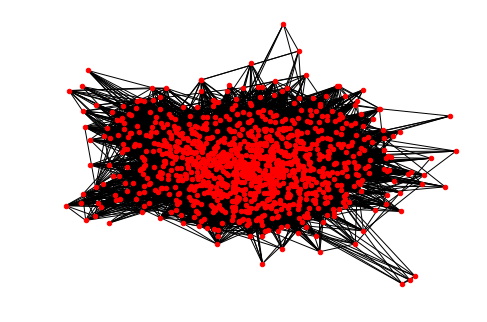

In [13]:
from networkx.algorithms import bipartite

## book_book
B1 =  bipartite.weighted_projected_graph(B,bottom_nodes)
nx.draw(B1, with_labels=False, node_size=20)

In [14]:
B1_degree=pd.Series(nx.degree_centrality(B1))
B1_betweenness=pd.Series(nx.betweenness_centrality(B1))
B1_closeness=pd.Series(nx.closeness_centrality(B1))
nx.density(B1)

0.08725748269474505

In [15]:
Book_Book_matrix=pd.DataFrame([pd.Series([a for (a,b,c) in B1.edges(data=True)]),pd.Series([b for (a,b,c) in B1.edges(data=True)]),pd.Series([c['weight'] for (a,b,c) in B1.edges(data=True)])]).T
Book_Book_matrix.columns=['Book_i','Book_j','#copurchased']
Book_Book_matrix.head()

,Book_i,Book_j,#copurchased
0,096220367X,0312980140,1
1,096220367X,0740727109,1
2,096220367X,0060956828,1
3,096220367X,0805241892,1
4,096220367X,1402535996,1


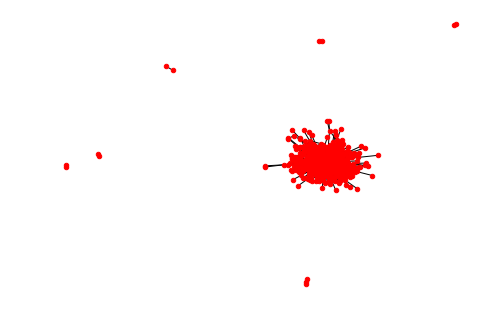

<Figure size 1440x720 with 0 Axes>

In [16]:
Book_Book_matrix2 =Book_Book_matrix[Book_Book_matrix['#copurchased'] > Book_Book_matrix['#copurchased'].mean()]
B1_2=nx.from_pandas_edgelist(Book_Book_matrix2, 'Book_i', 'Book_j', '#copurchased')
B1_2=B1_2.to_undirected()
nx.draw(B1_2, pos=nx.spring_layout(B1_2),node_size=20)
plt.figure(figsize=(20,10))
plt.show()

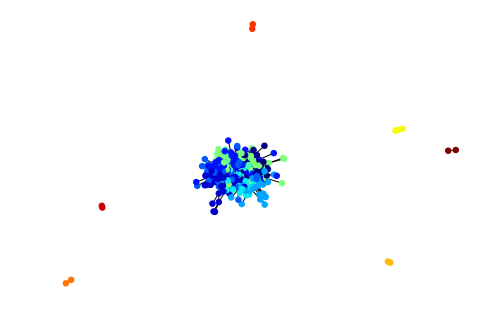

<Figure size 1440x720 with 0 Axes>

In [18]:
import community
Book_Book_matrix2 =Book_Book_matrix[Book_Book_matrix['#copurchased'] > Book_Book_matrix['#copurchased'].mean()]
B1_2=nx.from_pandas_edgelist(Book_Book_matrix2, 'Book_i', 'Book_j', '#copurchased')
B1_2=B1_2.to_undirected()
#nx.draw(B1_2, pos=nx.spring_layout(B1_2),node_size=20)

part = community.best_partition(B1_2)
values = [part.get(node) for node in B1_2.nodes()]
nx.draw_spring(B1_2, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.figure(figsize=(20,10))
plt.show()

In [19]:
from community import community_louvain

p = community_louvain.best_partition(B1_2)

In [20]:
df = pd.DataFrame(columns=['book_id','cluster_num'])
i=0
for k, v in p.items():
    df.loc[i] = [k,v]
    i = i + 1

In [55]:
df['cluster_num'].value_counts()

1     203
6     193
4     182
2     153
0     119
3      71
5      31
7       3
12      2
11      2
10      2
9       2
8       2
Name: cluster_num, dtype: int64

In [32]:
category = pd.read_csv("df_sub_category.csv")

In [33]:
category.head()

,Book_id,Customer_id,Book_id_l,category
0,0439064872,3QVAKVRAH657N,['0439064872'],Children's Books
1,0439064872,30KEXFT9SILL6,['0439064872'],Children's Books
2,0439064872,3KF4IP2MUS8QQ,['0439064872'],Children's Books
3,0439064872,2F3M93RRLFQNJ,['0439064872'],Children's Books
4,0439064872,1IU7S4HCK1XK0,['0439064872'],Children's Books


In [50]:
 df[df['cluster_num']== 1].merge(category, left_on='book_id', right_on='Book_id' )['category'].value_counts()[:1]

Business & Investing    793
Name: category, dtype: int64

In [51]:
 df[df['cluster_num']== 6].merge(category, left_on='book_id', right_on='Book_id' )['category'].value_counts()[:1]

Literature & Fiction    1307
Name: category, dtype: int64

In [56]:
 df[df['cluster_num']== 4].merge(category, left_on='book_id', right_on='Book_id' )['category'].value_counts()[:1]

Mystery & Thrillers    1830
Name: category, dtype: int64

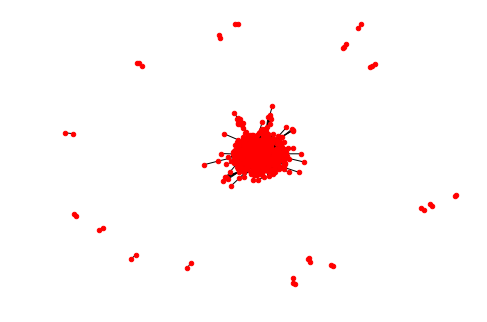

In [28]:
Book_Book_matrix3 =Book_Book_matrix[Book_Book_matrix['#copurchased'] > 2]
B1_3=nx.from_pandas_edgelist(Book_Book_matrix3, 'Book_i', 'Book_j', '#copurchased')
B1_3=B1_3.to_undirected()
nx.draw(B1_3, pos=nx.spring_layout(B1_3),node_size=20)
plt.show()

### get book sub_category

In [29]:
df_amazon=pd.read_csv('amazon.csv')
df_amazon=df_amazon.set_index('ASIN')
df_amazon_book=df_amazon[df_amazon.group=='Book']

In [30]:
import re
def get_category(s):
    cat=re.findall('Books.+',s)
    if len(cat)>0:
        a=cat[0].split('|')
        if len(a)>2:
            return a[2].split('[')[0]
        elif len(a)>1:
            return a[1].split('[')[0]
        elif len(a)>0:
            return a[0].split('[')[0]
        else:
            return None
    else:
        return None

In [31]:
df_amazon_book['category']=df_amazon_book['fulltxt'].map(lambda s:get_category(s))
df_amazon_book['category'].value_counts().head(10)

C:\Users\rache\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Children's Books           40689
Literature & Fiction       31931
Nonfiction                 31116
Business & Investing       26904
Religion & Spirituality    25476
Health, Mind & Body        24236
History                    17536
Biographies & Memoirs      15369
Computers & Internet       14803
Arts & Photography         14710
Name: category, dtype: int64

In [32]:
get_cat=df_amazon_book['category']
df_sub['category']=df_sub['Book_id'].map(lambda s:get_cat[s])

#### Subcategory - Children's Books

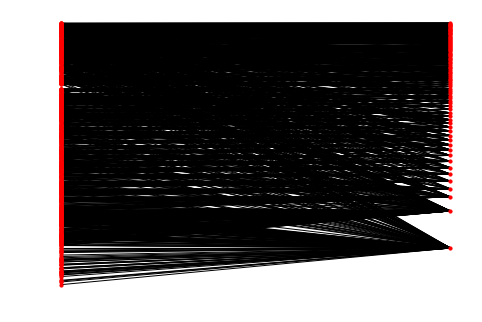

In [33]:
df_sub_subcat=df_sub[df_sub['category']=='Children\'s Books']

# Book_Customer
B = nx.Graph()
B.add_nodes_from(df_sub_subcat['Book_id'], bipartite=0)
B.add_nodes_from(df_sub_subcat['Customer_id'], bipartite=1)
B.add_edges_from([(row['Customer_id'], row['Book_id']) for idx, row in df_sub_subcat.iterrows()])

pos = {node:[0, i] for i,node in enumerate(df_sub_subcat['Customer_id'])}
pos.update({node:[1, i] for i,node in enumerate(df_sub_subcat['Book_id'])})
nx.draw(B, pos, with_labels=False,node_size=10)

In [34]:
print(bipartite.average_clustering(B))

0.42429653684803115


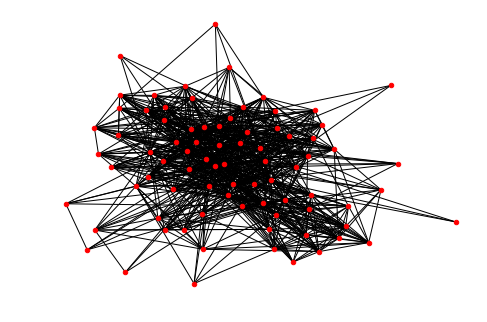

In [35]:
bottom_nodes, top_nodes = bipartite.sets(B)
clustering_coef=bipartite.clustering(B)

## book_book
B1 =  bipartite.weighted_projected_graph(B,bottom_nodes)
nx.draw(B1, with_labels=False, node_size=20)

In [36]:
print(nx.average_clustering(B1))

0.6425422918800983


#### Subcategory - Literature & Fiction

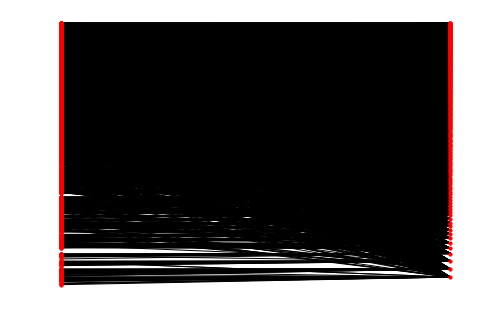

In [37]:
df_sub_subcat=df_sub[df_sub['category']=='Literature & Fiction']

# Book_Customer
B = nx.Graph()
B.add_nodes_from(df_sub_subcat['Book_id'], bipartite=0)
B.add_nodes_from(df_sub_subcat['Customer_id'], bipartite=1)
B.add_edges_from([(row['Customer_id'], row['Book_id']) for idx, row in df_sub_subcat.iterrows()])

pos = {node:[0, i] for i,node in enumerate(df_sub_subcat['Customer_id'])}
pos.update({node:[1, i] for i,node in enumerate(df_sub_subcat['Book_id'])})
nx.draw(B, pos, with_labels=False,node_size=10)

In [38]:
print(bipartite.average_clustering(B))

0.29625239536904885


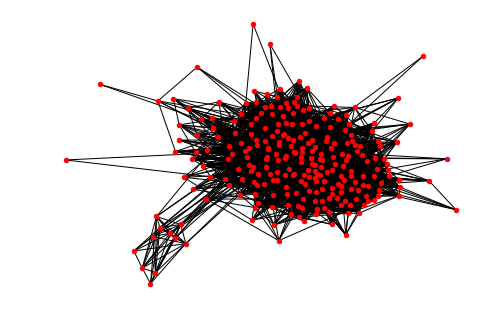

In [39]:
bottom_nodes, top_nodes = bipartite.sets(B)
clustering_coef=bipartite.clustering(B)

## book_book
B1 =  bipartite.weighted_projected_graph(B,bottom_nodes)
nx.draw(B1, with_labels=False, node_size=20)

In [40]:
print(nx.average_clustering(B1))

0.515512789123202


              degree
0312421273  0.627907
0452282152  0.612403
0375400117  0.511628
0684833395  0.437984
0684837889  0.426357
0618101365  0.406977
0140434267  0.406977
0739302213  0.379845
037540872X  0.375969
0451524497  0.368217


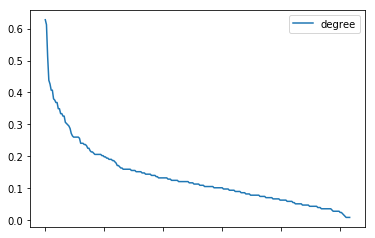

In [41]:
degree=pd.Series(nx.degree_centrality(B1))
betweenness=pd.Series(nx.betweenness_centrality(B1))
closeness=pd.Series(nx.closeness_centrality(B1))

degree = pd.DataFrame(degree)
degree.columns = ['degree']
degree = degree.sort_values("degree", ascending = False)
degree_10 = degree.head(10)
print(degree_10)
import matplotlib.pyplot as plt
degree.plot()

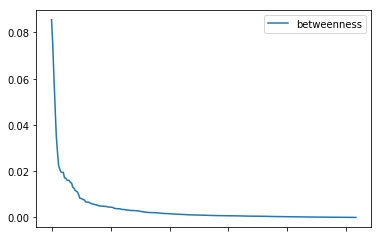

In [52]:
betweenness = pd.DataFrame(betweenness)
betweenness.columns = ['betweenness']
betweenness = betweenness.sort_values("betweenness", ascending = False)
betweenness_10 = betweenness.head(10)
betweenness.plot()

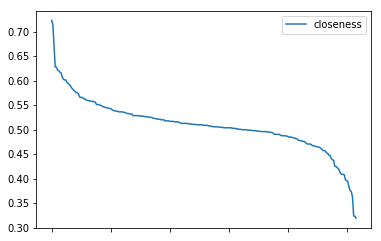

In [51]:
closeness = pd.DataFrame(closeness)
closeness.columns = ['closeness']
closeness = closeness.sort_values("closeness", ascending = False)
closeness_10 = closeness.head(10)
closeness.plot()

#### Subcategory - Business & Investing

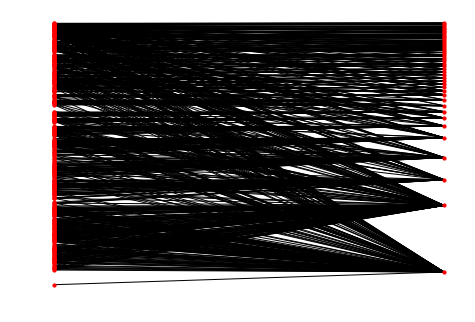

In [44]:
df_sub_subcat=df_sub[df_sub['category']=='Business & Investing']

# Book_Customer
B = nx.Graph()
B.add_nodes_from(df_sub_subcat['Book_id'], bipartite=0)
B.add_nodes_from(df_sub_subcat['Customer_id'], bipartite=1)
B.add_edges_from([(row['Customer_id'], row['Book_id']) for idx, row in df_sub_subcat.iterrows()])

pos = {node:[0, i] for i,node in enumerate(df_sub_subcat['Customer_id'])}
pos.update({node:[1, i] for i,node in enumerate(df_sub_subcat['Book_id'])})
nx.draw(B, pos, with_labels=False,node_size=10)

In [45]:
print(bipartite.average_clustering(B))

0.5134946654296042


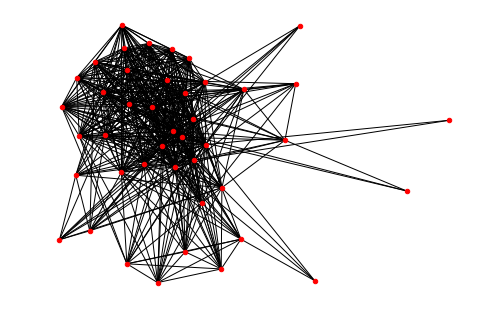

In [46]:
bottom_nodes, top_nodes = bipartite.sets(B)
clustering_coef=bipartite.clustering(B)

## book_book
B1 =  bipartite.weighted_projected_graph(B,bottom_nodes)
nx.draw(B1, with_labels=False, node_size=20)

In [47]:
print(nx.average_clustering(B1))

0.8522139984731822


### Recommendation

In [48]:
import pandas as pd

df_amazon=pd.read_csv('amazon.csv')
df_amazon=df_amazon.set_index('ASIN')
df_sub['Book_id_l']=df_sub['Book_id'].map(lambda x:[x])
customer_book=df_sub.groupby('Customer_id')['Book_id_l'].sum()
get_title=df_amazon['title']

B1_path=dict(nx.all_pairs_dijkstra_path(B1))
B1_length=dict(nx.all_pairs_dijkstra_path_length(B1))

In [49]:
def recommend(customer_id):
    book_list=customer_book[customer_id]
    rec_list=[]
    degree_list=[]
    betweenness_list=[]
    closeness_list=[]
    for book_id in book_list:
        i=0
        r=pd.Series(B1_length[book_id]).sort_values().index
        while r[i] in book_list:
            i+=1
        r1=r[i]   
        rec_list.append(r1)
        degree_list.append(B1_degree[r1])
        betweenness_list.append(B1_betweenness[r1])
        closeness_list.append(B1_closeness[r1])
    df=pd.DataFrame([rec_list,degree_list,betweenness_list,closeness_list]).T
    df.columns=['rec_id','degree','betweenness','closeness']
    df_rec_count=df['rec_id'].value_counts()
    df['count']=df['rec_id'].map(lambda s:df_rec_count[s])
    df=df.drop_duplicates()
    df['score']=0.5*df['count']+0.5*(df['degree']+df['betweenness']+df['closeness'])
    df=df.sort_values(by='score',ascending=False)
    if len(df)<6:
        return [get_title[x] for x in df['rec_id'].values]
    else:
        return [get_title[x] for x in df.iloc[:5]['rec_id'].values]

In [50]:
recommend('10KKJMBY5L7TK')

KeyError: '0694522430'

In [53]:
[get_title[x] for x in customer_book['10KKJMBY5L7TK']]

['Professor and The Madman, The : Unabridged',
 'How to Win Friends & Influence People',
 'How the Irish Saved Civilization (Hinges of History)',
 'The First World War',
 'Faith of the Fallen (Sword of Truth, Book 6)',
 'Stone of Tears (Sword of Truth, Book 2)',
 'Lord of Chaos (The Wheel of Time, Book 6)',
 "Foundation's Edge (Foundation Novels (Paperback))"]

### Customer Network

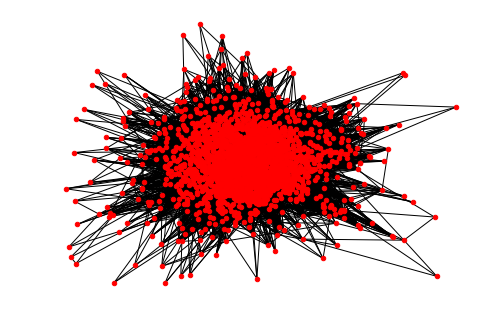

In [43]:
# customer_customer
B2 = bipartite.weighted_projected_graph(B, top_nodes)
nx.draw(B2, with_labels=False,node_size=20)

In [44]:
Customer_Customer_matrix=pd.DataFrame([pd.Series([a for (a,b,c) in B2.edges(data=True)]),pd.Series([b for (a,b,c) in B2.edges(data=True)]),pd.Series([c['weight'] for (a,b,c) in B2.edges(data=True)])]).T
Customer_Customer_matrix.columns=['Customer_i','Customer_j','#copurchased']
Customer_Customer_matrix.head()

,Customer_i,Customer_j,#copurchased
0,1GEM4VWJUU47P,24BI5J96Q5DDD,1
1,1GEM4VWJUU47P,2KCBPYKU38J46,1
2,1GEM4VWJUU47P,3EUCPZ1LFBKO6,1
3,1GEM4VWJUU47P,3D9VXSUDX8J36,2
4,1GEM4VWJUU47P,185H69S1490LG,1


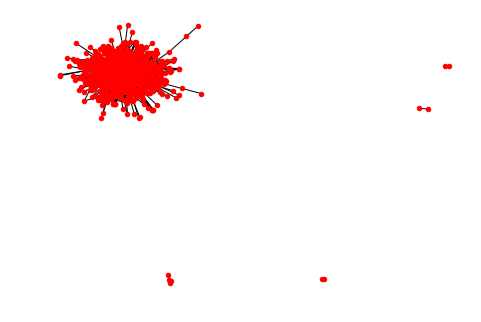

<Figure size 1440x720 with 0 Axes>

In [45]:
Customer_Customer_matrix2 =Customer_Customer_matrix[Customer_Customer_matrix['#copurchased'] > Customer_Customer_matrix['#copurchased'].mean()]
C1_2=nx.from_pandas_edgelist(Customer_Customer_matrix2, 'Customer_i', 'Customer_j', '#copurchased')
C1_2=C1_2.to_undirected()
nx.draw(C1_2, pos=nx.spring_layout(C1_2),node_size=20)
plt.figure(figsize=(20,10))
plt.show()

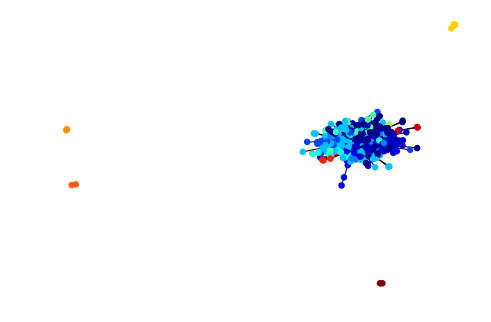

<Figure size 1440x720 with 0 Axes>

In [46]:
Customer_Customer_matrix2 =Customer_Customer_matrix[Customer_Customer_matrix['#copurchased'] > Customer_Customer_matrix['#copurchased'].mean()]
C1_2=nx.from_pandas_edgelist(Customer_Customer_matrix2, 'Customer_i', 'Customer_j', '#copurchased')
C1_2=C1_2.to_undirected()

part2 = community.best_partition(C1_2)
values2 = [part2.get(node) for node in C1_2.nodes()]
nx.draw_spring(C1_2, cmap = plt.get_cmap('jet'), node_color = values2, node_size=30, with_labels=False)
plt.figure(figsize=(20,10))
plt.show()

In [47]:
from community import community_louvain

p2 = community_louvain.best_partition(C1_2)

In [48]:
df2 = pd.DataFrame(columns=['customer_id','cluster_num'])
i=0
for k, v in p2.items():
    df2.loc[i] = [k,v]
    i = i + 1

In [49]:
df2['cluster_num'].value_counts()

4     516
0     375
1     312
2     241
5     225
3     126
7      91
8      68
10     39
6      30
9      29
11      7
12      5
13      4
14      4
16      2
15      2
17      2
Name: cluster_num, dtype: int64